# EM算法

期望最大化(Expectation- Maximization)算法是一种迭代 算法，是在概率模型中寻找参 数极大似然估计的算法，其中 概率模型依赖于无法观测的隐 含变量。

EM算法是一个基础算法，是很多机器学习领域算法的基础，比如隐式马尔科夫算法（HMM), LDA主题模型的变分推断等等。

EM算法可以保证
收敛到一个稳定点，但是却不能保证收敛到
全局的极大值点，因此它是局部最优的算法，
当然，如果优化目标是凸的，则EM算法可
以保证收敛到全局最大值，这点和梯度下降
法这样的迭代算法相同。

<div align="center">
	<img src="1.jpg" width="60%">
</div>

### 例题1

<div align="center">
	<img src="2.jpg" width="60%">
</div>

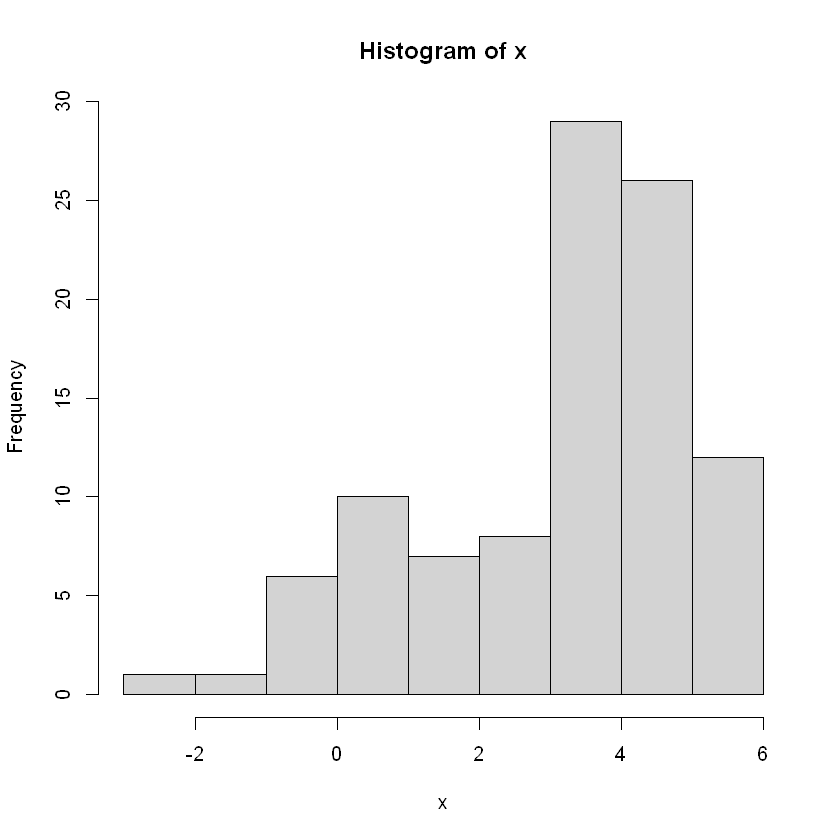

In [2]:
# 首先构造模拟的混合高斯分布数据：
mu1 <- 1
s1 <- 2
mu2 <- 4
s2 <- 1
lambda0 <- 0.4
n <- 100
set.seed(2017-09-12)
z <- rbinom(n, 1, lambda0)     ## "Missing" data  假设隐变量z服从伯努利分布
x <- rnorm(n, mu1 * z + mu2 * (1-z), s1 * z + (1-z) * s2)#x的均值和方差
hist(x)

[1] 0.3097435

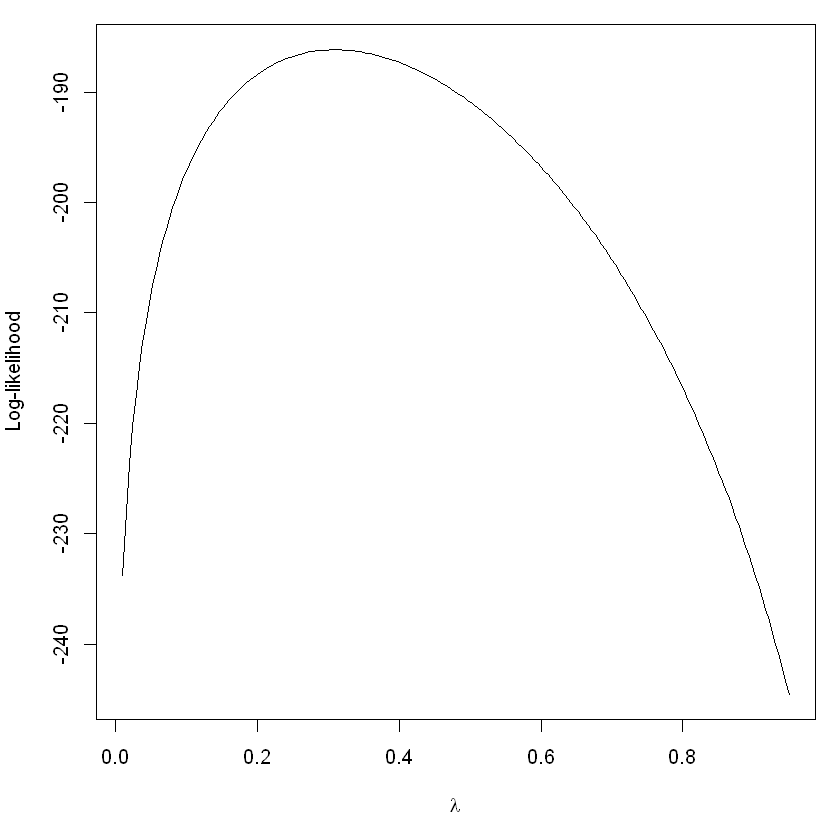

In [4]:
# 我们写一个用来生成混合概率密度的函数：
f <- function(x, lambda) {
        lambda * dnorm(x, mu1, s1) + (1-lambda) * dnorm(x, mu2, s2)
}
# 对上面那个函数求对数似然并加和
loglike <- function(lambda) {
        sum(log(f(x, lambda)))
}
loglike <- Vectorize(loglike, "lambda")  ## Vectorize for plotting
par(mar = c(5,4, 1, 1))
curve(loglike, 0.01, 0.95, n = 200, ylab = "Log-likelihood", xlab = expression(lambda))#可视化

op <- optimize(loglike, c(0.1, 0.9), maximum = TRUE)
op$maximum # 计算极值点

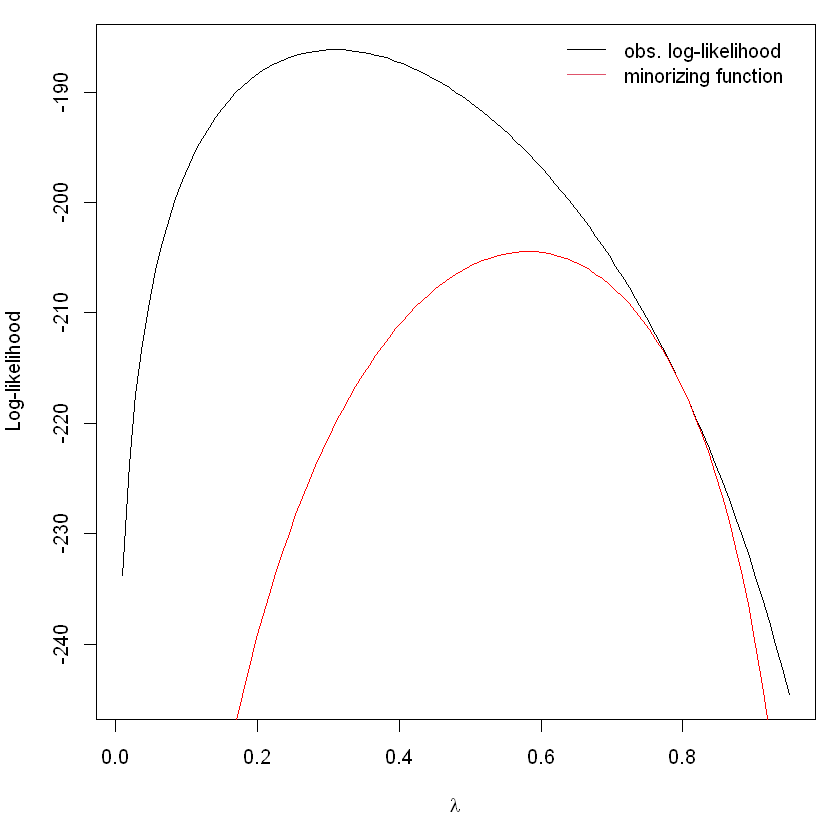

In [5]:
# 设定初值λ0=0.8，就是我们先验地给定混合高斯分布的混合比来构造下界函数
lam0 <- 0.8 # 初始化
minor <- function(lambda) {
        p1 <- sum(log(f(x, lam0)))
        pi <- lam0 * dnorm(x, mu1, s1) / (lam0 * dnorm(x, mu1, s1) 
                                          + (1 - lam0) * dnorm(x, mu2, s2))#pi是隐变量z的后验分布，是可以算出来的
        p2 <- sum(pi * dnorm(x, mu1, s1, log = TRUE) 
                  + (1-pi) * dnorm(x, mu2, s2, log = TRUE)
                  + pi * log(lambda)
                  + (1-pi) * log(1-lambda))
        p3 <- sum(pi * dnorm(x, mu1, s1, log = TRUE) 
                  + (1-pi) * dnorm(x, mu2, s2, log = TRUE)
                  + pi * log(lam0)
                  + (1-pi) * log(1-lam0))#
        p1 + p2 - p3
}
minor <- Vectorize(minor, "lambda")
#然后可视化minorising函数
par(mar = c(5,4, 1, 1))
curve(loglike, 0.01, 0.95, ylab = "Log-likelihood", 
      xlab = expression(lambda))
curve(minor, 0.01, 0.95, add = TRUE, col = "red")
legend("topright", c("obs. log-likelihood", "minorizing function"), 
       col = 1:2, lty = 1, bty = "n")

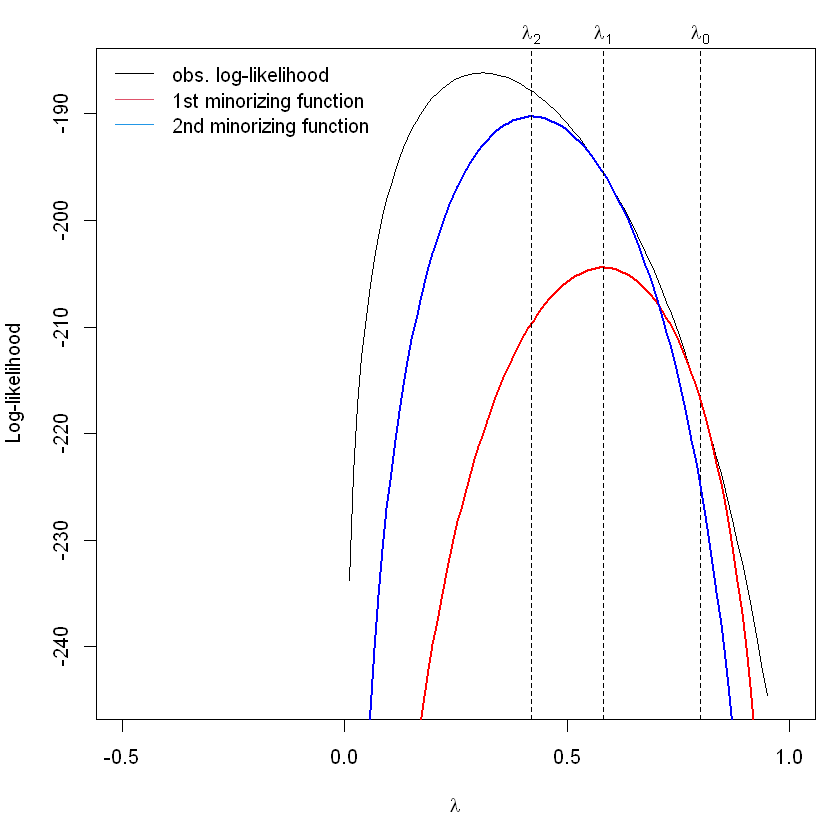

In [6]:
# 更新
par(mar = c(5,4, 2, 1))
curve(loglike, 0.01, 0.95, ylab = "Log-likelihood", 
      xlab = expression(lambda), xlim = c(-0.5, 1), #这是最开始的loglike
      ylim = c())
abline(v = lam0, lty = 2)
mtext(expression(lambda[0]), at = lam0, side = 3)
curve(minor, 0.01, 0.95, add = TRUE, col = "red", lwd = 2)#这是minor函数，还没求最值点的
op <- optimize(minor, c(0.1, 0.9), maximum = TRUE)#对红色的minor在(0.1, 0.9)范围内求最值点
abline(v = op$maximum, lty = 2)#添加第一个最值点对应的垂线，也就是λ1
lam0 <- op$maximum#然后重新把λ1赋值给初值，实现参数更新
curve(minor, 0.01, 0.95, add = TRUE, col = "blue", lwd = 2)#更新以后再画蓝色的下界函数，重复操作
abline(v = lam0, lty = 2)
mtext(expression(lambda[1]), at = lam0, side = 3)
op <- optimize(minor, c(0.1, 0.9), maximum = TRUE)
abline(v = op$maximum, lty = 2)
mtext(expression(lambda[2]), at = op$maximum, side = 3)
legend("topleft", 
       c("obs. log-likelihood", "1st minorizing function", "2nd minorizing function"), 
       col = c(1, 2, 4), lty = 1, bty = "n")

### 例题2

In [14]:
gene = function(p,n.obs,eps){
    n = sum(n.obs) # 不同表现型的个数
    nA = n.obs[1] 
    na = n.obs[2]
    naa = na
    pA = p # 基因概率关系
    pa = 1-p
    k = 0 # 初始化循环次数
    while(error >= eps){ 
        pA.old = pA
        pa.old = pa
        den = pA.old^2+2*pA.old*pa.old # 求期望
        nAA = nA*pA.old^2/den
        nAa = 2*nA*pA.old*pa.old/den
        pA = (2*nAA+nAa)/(2*n)
        pa = (2*naa+nAa)/(2*n)
        error = max(abs(pA-pA.old),abs(pa-pa.old))
        k = k+1
    }
    return(list(pA = pA,pa = pa,k = k,error = error))
}
n.obs = c(95,68) # observed data
p = 3/4
error = 1e-4
a = gene(p,n.obs,error)
print(a)

$pA
[1] 0.3541191

$pa
[1] 0.6458809

$k
[1] 7

$error
[1] 4.442984e-05